In [1]:
from schemdraw import flow, Drawing
import numpy as np

In [2]:
# RUN THIS BLOCK IF YOU WANT INLINE GRAPICS
# DO NOT RUN THIS BLOCK IF YOU WANT POPOUT GRAPHICS
%matplotlib inline

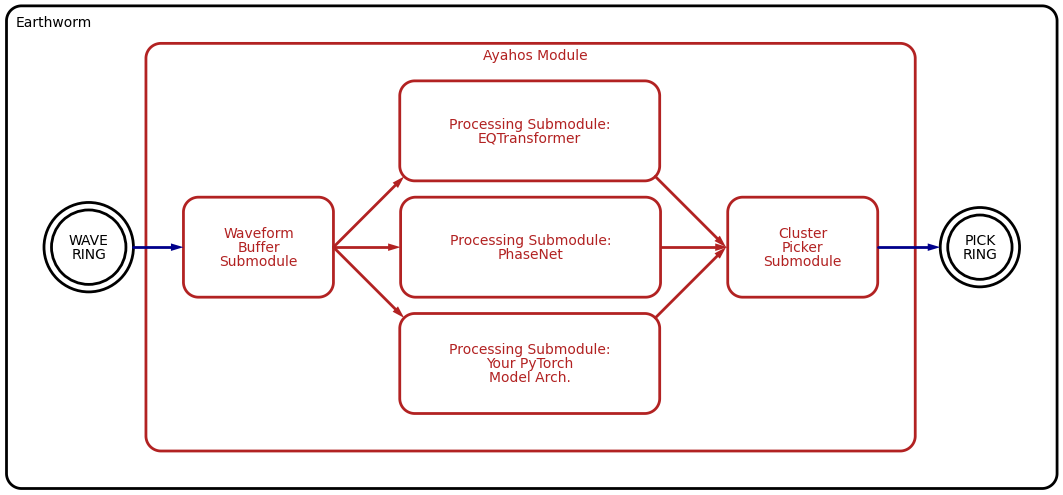

In [3]:
with Drawing() as D:
    D.config(fontsize=10, unit=1)
    with D.container() as EW:
        EW.label('Earthworm')
        s1 = flow.StateEnd().label('WAVE\nRING')
        flow.Arrow().right(D.unit).at(s1.E).color('darkblue')
        with D.container() as AY:
            AY.label('Ayahos Module',
                    loc='N',
                    halign='center',
                    valign='top')
            AY.color('firebrick')
            p1 = flow.RoundProcess().label('Waveform\nBuffer\nSubmodule').color('firebrick')
            # Center Tube
            flow.Arrow().at(p1.E).theta(0).length(D.unit*1.9*np.cos(0.25*np.pi)).color('firebrick')
            p2b = flow.RoundProcess().label('Processing Submodule:\nPhaseNet').color('firebrick')
            flow.Arrow().at(p2b.E).length(D.unit*1.9*np.cos(0.25*np.pi)).color('firebrick')
            # Complete mapping out to end of Ayahos module
            p3 = flow.RoundProcess().label('Cluster\nPicker\nSubmodule').color('firebrick')

            # Upper Submodule
            flow.Arrow().theta(45).at(p1.E).length(D.unit*2).color('firebrick')
            p2a = flow.RoundProcess().label('Processing Submodule:\nEQTransformer').color('firebrick')
            flow.Arrow().theta(-45).at(p2a.SE).length(D.unit*2).color('firebrick')

            # Lower Submodule
            flow.Arrow().at(p1.E).theta(-45).length(D.unit*2).color('firebrick')
            p2c = flow.RoundProcess().label('Processing Submodule:\nYour PyTorch\nModel Arch.').color('firebrick')
            flow.Arrow().theta(45).length(D.unit*2).at(p2c.NE).color('firebrick')

        flow.Arrow().right(D.unit*1.25).at(p3.E).color('darkblue')
        s2 = flow.StateEnd().label('PICK\nRING')


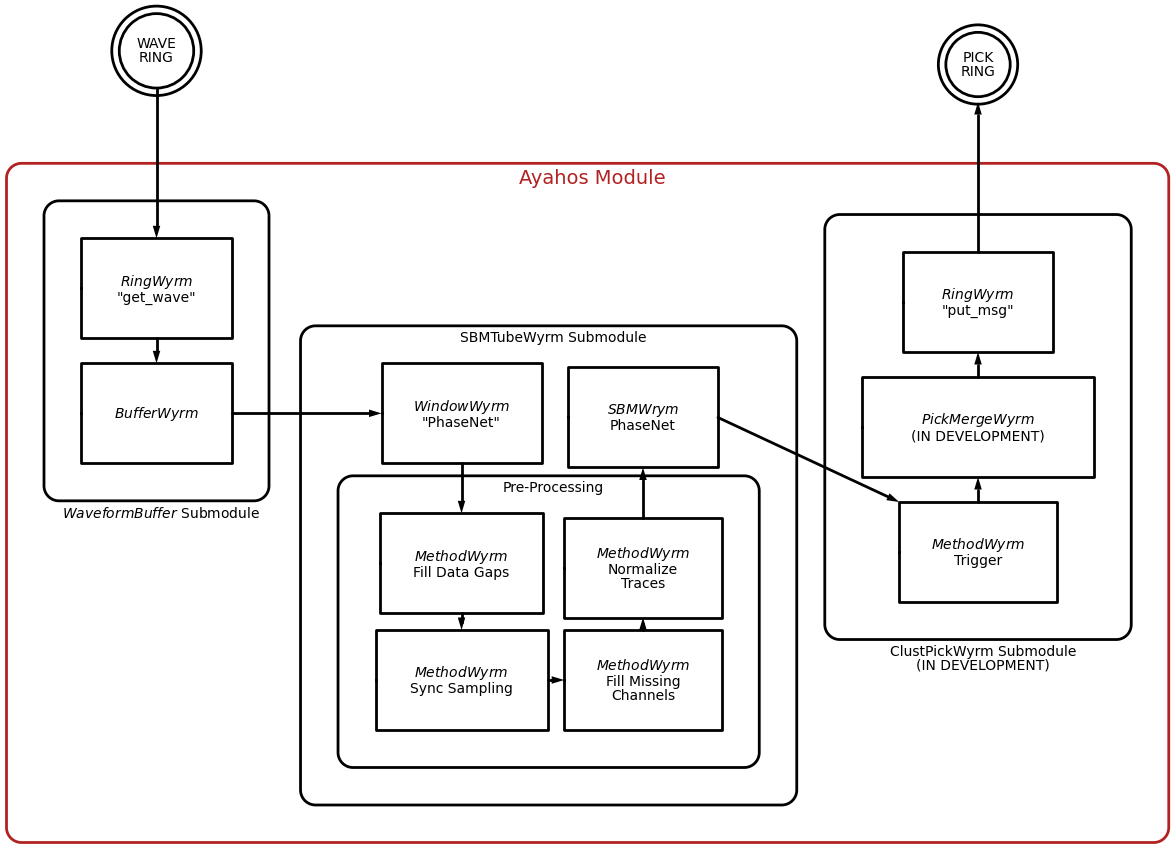

In [4]:
# More detailed schematic showing individual Wyrm base modules

with Drawing() as D:
    D.config(fontsize=10)
    D.config(unit=1)
    D.config()
    s1 = flow.StateEnd().label('WAVE\nRING')
    flow.Arrow().down(D.unit*3).at(s1.S)

    # Ayahos Module Container
    with D.container() as AY:
        AY.label(
            'Ayahos Module',
            loc='N',
            halign='center',
            valign='top',
            fontsize=14,
            color='firebrick')
        AY.color('firebrick')

        # RingBuffer Submodule
        with AY.container() as RB:
            RB.label('$WaveformBuffer$ Submodule', loc='S', valign='top', halign='center')
            p1 = flow.Process().label('$RingWyrm$\n"get_wave"')
            flow.Arrow().down(D.unit/2).at(p1.S)
            p2 = flow.Process().label('$BufferWyrm$')

        flow.Arrow().right(D.unit*3).at(p2.E)
        # SeisBenchModel TubeWyrm Submodule
        with AY.container() as TW:
            TW.label(
                'SBMTubeWyrm Submodule',
                loc='N',
                halign='center',
                valign='top')
            p3 = flow.Process().label('$WindowWyrm$\n"PhaseNet"')
            flow.Arrow().down(D.unit).at(p3.S) #length(D.unit*3).theta(60).at(p3.NE)
            # PreProcessing Submodule
            with TW.container() as PP:
                PP.label('Pre-Processing', loc='N', halign='center', valign='top')
                p4a = flow.Process().label('$MethodWyrm$\nFill Data Gaps')
                flow.Arrow().down(D.unit/3)
                p4b = flow.Process().label('$MethodWyrm$\nSync Sampling')
                flow.Arrow().right(D.unit/3).at(p4b.E)
                p4c = flow.Process().label('$MethodWyrm$\nFill Missing\nChannels')
                flow.Arrow().up(D.unit/4).at(p4c.N)
                p4d = flow.Process().label('$MethodWyrm$\nNormalize\nTraces')
            # Prediction
            flow.Arrow().up(D.unit).at(p4d.N)
            p5 = flow.Process().label('$SBMWrym$\nPhaseNet')
        flow.Arrow().length(D.unit*4).at(p5.E).theta(-25)
        # Cluster Picker Submodule
        with AY.container() as CP:
            CP.label('ClustPickWyrm Submodule\n(IN DEVELOPMENT)',
                     loc='S', halign='center', valign='top')
            p6 = flow.Process().label('$MethodWyrm$\nTrigger')
            flow.Arrow().up(D.unit/2).at(p6.N)
            p7 = flow.Process().label('$PickMergeWyrm$\n(IN DEVELOPMENT)')
            flow.Arrow().up(D.unit/2).at(p7.N)
            p8 = flow.Process().label('$RingWyrm$\n"put_msg"')
    flow.Arrow().up(D.unit*3)
    s2 = flow.StateEnd().label('PICK\nRING')

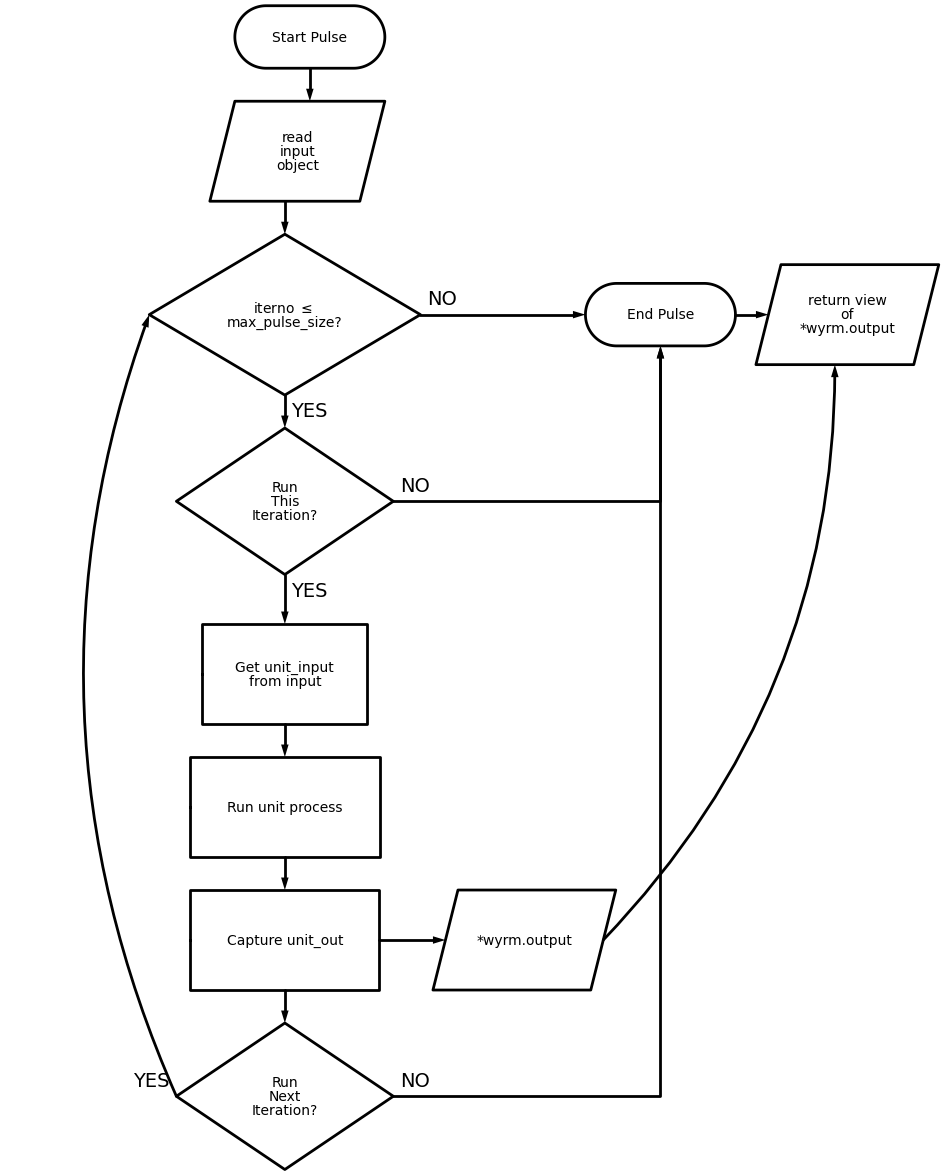

In [5]:
# Pulse Template Flow Diagram
with Drawing(canvas='matplotlib') as E:
    E.config(fontsize=10, unit=0.66)
    start = flow.Start().label('Start Pulse')
    flow.Arrow().down().at(start.S)
    input = flow.Data().label('read\ninput\nobject')
    flow.Arrow().down().at(input.S)
    d1 = flow.Decision(S='YES', E='NO').label('iterno $\\leq$ \nmax_pulse_size?')
    flow.Arrow().right(E.unit*5).at(d1.E)
    end = flow.Start().label('End Pulse').anchor('W')
    flow.Arrow().right().at(end.E)
    output = flow.Data().label('return view\nof\n*wyrm.output')

    flow.Arrow().down().at(d1.S)
    d2 = flow.Decision(S='YES', E='NO').label('Run\nThis\nIteration?')
    flow.Arrow().down().at(d2.S).length(E.unit*1.5)
    p1 = flow.Process().label('Get unit_input\nfrom input')
    flow.Arrow().down().at(p1.S)
    p2 = flow.Process().label('Run unit process')
    flow.Arrow().down().at(p2.S)
    p3 = flow.Process().label('Capture unit_out')
    flow.Arrow().right(E.unit*2).at(p3.E)
    a3 = flow.Data().label('*wyrm.output')

    flow.Arrow().down().at(p3.S)
    d3 = flow.Decision(W='YES', E='NO').label('Run\nNext\nIteration?')

    flow.Arc2(arrow='<-', k=-.2).at(d1.W).to(d3.W)
    flow.Arc2(arrow='->', k=-.2).at(a3.E).to(output.S)
    flow.Wire(shape='-|', arrow='->').at(d2.E).to(end.S)
    flow.Wire(shape='-|', arrow='->').at(d3.E).to(end.S)


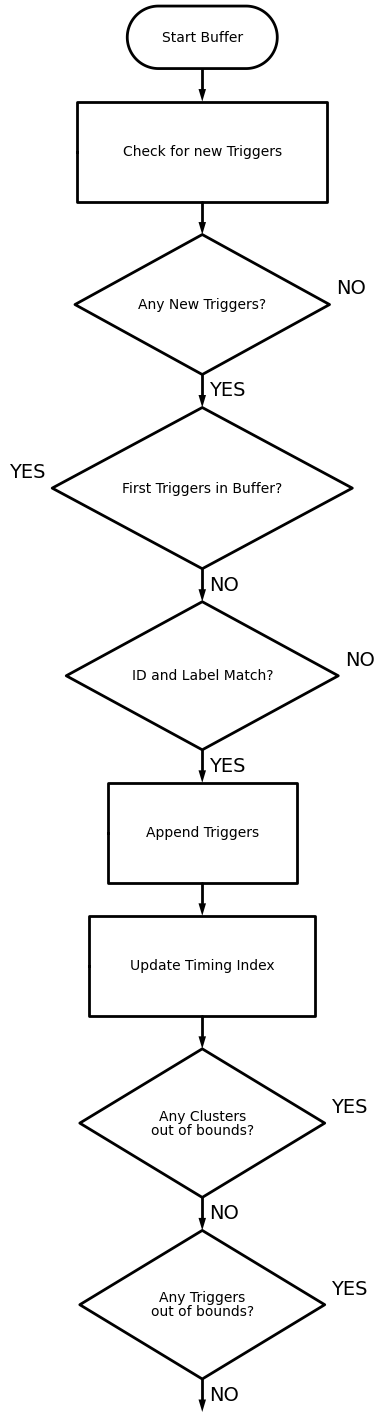

In [13]:
with Drawing(canvas='matplotlib') as T:
    T.config(fontsize=10, unit=0.66)
    start = flow.Start().label('Start Buffer')
    flow.Arrow().down().at(start.S)
    p1 = flow.Process().label('Check for new Triggers')
    flow.Arrow().down().at(p1.S)
    new_trig = flow.Decision(W='NO', S='YES').label('Any New Triggers?')
    flow.Arrow().down().at(new_trig.S)
    first_trigs = flow.Decision(E='YES', S='NO').label('First Triggers in Buffer?')
    flow.Arrow().down()
    id_match = flow.Decision(W='NO', S='YES').label('ID and Label Match?')
    flow.Arrow().down().at(id_match.S)
    p2 = flow.Process().label('Append Triggers')
    flow.Arrow().down().at(p2.S)
    p3 = flow.Process().label('Update Timing Index')
    flow.Arrow().down()
    oob_cluster = flow.Decision(W='YES', S='NO').label('Any Clusters\nout of bounds?')
    flow.Arrow().down()
    oob_trigger = flow.Decision(W='YES', S='NO').label('Any Triggers\nout of bounds?')
    flow.Arrow().down()

    